In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import os
if 'notebooks' in os.getcwd():
    os.chdir('..')

import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from src.metrics import amex_metric

# Dimensionality reduction

The first approach is to reduce data dimensionality by getting the average feature for a given company

In [3]:
grouped_dfs = []
for df in tqdm(pd.read_csv("data/train_data.csv", chunksize= 1e5)):
    grouped_dfs.append(
        df.groupby("customer_ID").mean()
    )

1it [00:04,  4.29s/it]


KeyboardInterrupt: 

In [ ]:
avg_feat_df = pd.concat(grouped_dfs)

In [ ]:
avg_feat_df

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,NaN,NaN,...,NaN,NaN,NaN,0.003664,0.005343,0.005178,NaN,0.005066,0.005283,0.005814
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,NaN,0.144571,...,NaN,NaN,NaN,0.004906,0.006271,0.006007,NaN,0.004824,0.004218,0.004902
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878454,0.004181,0.004386,0.815677,0.006621,NaN,0.006842,0.005493,NaN,NaN,...,NaN,NaN,NaN,0.006006,0.004675,0.003607,NaN,0.004288,0.005113,0.004500
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,NaN,0.061026,...,NaN,NaN,NaN,0.005775,0.005777,0.004181,NaN,0.006742,0.004768,0.005236
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891679,0.004644,0.005941,0.814543,0.004180,0.173102,0.005352,0.005088,NaN,0.048778,...,NaN,NaN,NaN,0.003853,0.004818,0.004818,NaN,0.004852,0.004380,0.004219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0.848750,0.119236,0.029180,1.005166,0.005458,0.125981,0.003923,0.005814,NaN,0.152566,...,NaN,NaN,NaN,0.007432,0.005698,0.004995,NaN,0.003367,0.005605,0.005315
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.859327,0.066421,0.368335,0.042358,0.005542,0.273668,0.005306,0.271978,NaN,0.327520,...,NaN,NaN,NaN,0.005071,0.003799,0.005458,NaN,0.004469,0.006052,0.005622
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.786838,0.221548,0.043031,0.854813,0.004751,0.084385,0.182801,0.057544,NaN,0.121265,...,NaN,NaN,NaN,0.004716,0.003858,0.004838,NaN,0.006621,0.004860,0.003917


In [ ]:
if not os.path.exists("data/pre-processed"):
    os.mkdir("data/pre-processed")

avg_feat_df.to_parquet("data/pre-processed/avg_features_df.parquet")

## Features correlation

In order to reduce dimensionality we will look at the correlation of features with target values and with other features. The objective is to select the most important features to the classifier

In [3]:
avg_feat_df = pd.read_parquet("data/pre-processed/avg_features_df.parquet")

In [4]:
corr = avg_feat_df.corr()
corr.style.background_gradient(cmap='coolwarm')

c:\Users\User\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\User\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [5]:
correlation_dict = {}
for idx, row in corr.iterrows():
    feature_name = row.name

    try:
        highly_correlated = row[row.abs()>0.7]\
            .drop(feature_name)
    except:
        print(feature_name)

    for correlated_feature_name, value in highly_correlated.items():
        if not((feature_name, correlated_feature_name) in correlation_dict or \
              (correlated_feature_name, feature_name) in correlation_dict):
              
            correlation_dict[feature_name, correlated_feature_name] = value

D_87


In [6]:
selected_features = pd.Series(correlation_dict)\
    .index\
    .get_level_values(level = 0 )\
    .unique()

In [7]:
mask = avg_feat_df.columns.isin(selected_features)
features_df = avg_feat_df[avg_feat_df.columns[mask]]

## Correlation with target

In [8]:
target_df = pd.read_csv("data/train_labels.csv")\
    .set_index("customer_ID")

In [9]:
target_df

,target
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0
...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0


In [10]:
reindexed_features_df = features_df.reset_index()\
    .groupby("customer_ID")\
    .mean()\
    .reindex(index = target_df.index)

In [11]:
higher_correlated_with_target = reindexed_features_df\
    .corrwith(target_df['target'])\
    .abs()\
    .sort_values()\
    .tail(10)\
    .index

In [12]:
X = reindexed_features_df[higher_correlated_with_target.to_list()]\
    .dropna()

In [13]:
X

,B_7,D_58,D_44,D_61,B_33,B_18,R_1,B_2,D_48,P_2
customer_ID,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.036624,0.064803,0.004673,0.225847,1.004033,0.842565,0.004509,1.005086,0.240978,0.933824
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.028049,0.005146,0.004311,0.053319,1.005387,1.004884,0.006246,0.991083,0.048203,0.899820
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.034433,0.023569,0.013902,0.109526,1.004301,0.933173,0.006621,0.815677,0.092284,0.878454
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.062130,0.023349,0.005246,0.066872,1.004060,0.910999,0.005665,0.955264,0.076686,0.598969
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.115290,0.318151,0.003551,0.356445,1.004946,0.610194,0.004180,0.814543,0.253697,0.891679
...,...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0.028677,0.006498,0.005449,0.028461,1.006705,1.004918,0.005458,1.005166,0.033075,0.848750
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.307226,0.388265,0.129993,0.770719,0.004976,0.146152,0.005542,0.042358,0.133014,0.859327
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.034375,0.004639,0.005649,0.122203,0.850944,0.904073,0.004751,0.854813,0.124234,0.786838


In [14]:
y = target_df.reindex(index = X.index)

## Cross validation

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.3,
    random_state = 42
)

In [16]:
scaler = StandardScaler()

## Logistic regression

In [18]:
(X_train.index == y_train.index).all()

True

In [19]:
clf = LogisticRegression()
clf.fit(scaler.fit_transform(X_train), y_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
y_pred = clf.predict_proba(scaler.fit_transform(X_test))[:, 1]

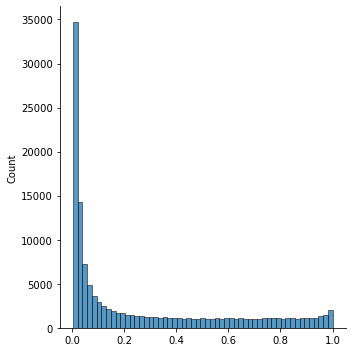

In [24]:
sns.displot(y_pred)

In [25]:
roc_auc_score(y_test, y_pred)

0.922264354950338

In [26]:
confusion_matrix(y_test, clf.predict(scaler.fit_transform(X_test)))

array([[86084,  7909],
       [10861, 23186]], dtype=int64)

In [28]:
y_pred = pd.DataFrame(
    y_pred, 
    index = y_test.index,
    columns = ['prediction']
)

In [29]:
y_pred

,prediction
customer_ID,
4a45a4ae4e7e4726de8154b4d252432e195f3d00a225c5c064c0321bfa191cc0,0.095858
7a1feafe977e349105bcf0fe64ae1345e7e89cb15a249de0963d74514097ffb8,0.020752
6b9ab35a04bda5d2d39acf55ad74609d35af34ec6a21e1533bb31802737886d1,0.246402
ba57712be7c84028409e7c4d34e259d210ab9519a1161e129d79d60ce605f76f,0.380755
3d8b3c6bcadac22a72915fe1b17b02daab75a15562420c928bd9c07741559707,0.077463
...,...
8db9ddbbec3247204fd2521c15b02b041265e7b01db746c00ef667ecdc8ae903,0.019602
a74d925b0762a1cad7383a510fc8dc8ba4ebd7b1278db281703cea47cdec6525,0.029591
fc8e1e5c320ca9aa7ef845ef45b38cb8379d80484c302b1d7d20abdbde30ab4a,0.905697


In [31]:
amex_metric(y_test, y_pred)

0.6365115345959395

## Decision tree

In [33]:
clf = DecisionTreeClassifier()
clf.fit(scaler.fit_transform(X_train), y_train)

DecisionTreeClassifier()

In [ ]:
clf.max_depth

In [35]:
plot_tree(clf)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000233F44BAC10> (for post_execute):
